In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
!pip install nltk

                                              0.0/1.5 MB ? eta -:--:--
     ----                                     0.2/1.5 MB 5.0 MB/s eta 0:00:01
     ------------------                       0.7/1.5 MB 8.9 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 13.8 MB/s eta 0:00:00
                                              0.0/97.9 kB ? eta -:--:--
     ---------------------------------------- 97.9/97.9 kB ? eta 0:00:00
                                              0.0/302.2 kB ? eta -:--:--
     ---------------------------------------- 302.2/302.2 kB ? eta 0:00:00
                                              0.0/268.3 kB ? eta -:--:--
     ------------------------------------- 268.3/268.3 kB 16.1 MB/s eta 0:00:00
                                              0.0/78.3 kB ? eta -:--:--
     ---------------------------------------- 78.3/78.3 kB ? eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#!pip install textblob

In [4]:
#!pip install collections

In [4]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\Kari
[nltk_data]     Lauro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Kari
[nltk_data]     Lauro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\Kari
[nltk_data]     Lauro\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kari Lauro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [27]:
!pip install vaderSentiment

                                              0.0/126.0 kB ? eta -:--:--
     -------------------------------------  122.9/126.0 kB 3.6 MB/s eta 0:00:01
     -------------------------------------- 126.0/126.0 kB 2.5 MB/s eta 0:00:00
                                              0.0/62.6 kB ? eta -:--:--
     ---------------------------------------- 62.6/62.6 kB ? eta 0:00:00
                                              0.0/96.6 kB ? eta -:--:--
     ---------------------------------------- 96.6/96.6 kB ? eta 0:00:00
                                              0.0/123.9 kB ? eta -:--:--
     -------------------------------------- 123.9/123.9 kB 7.1 MB/s eta 0:00:00
                                              0.0/158.3 kB ? eta -:--:--
     -------------------------------------- 158.3/158.3 kB 9.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df = pd.read_csv('RHIT JTA Combo Domain Names.csv')
df.head()

,StartDate,EndDate,Progress,Duration (in seconds),ResponseId,RecipientLastName,RecipientFirstName,Domain 1.1#1_1,Domain 1.1#1_2,Domain 1.1#1_3,...,Q5: Job Title,Q6: Supervisor,Q7: Company,Q8: Education,Q9: Employment,Q10: Gender,Q10: Gender_4_TEXT,Q11: Race/Ethnicity,Q12: Military,Q13: Age
0,1/24/2022 17:59,1/24/2022 18:27,100,1668,R_Ab1GK0xCu1rbaPT,Taylor,Elizabeth,4.0,4.0,4.0,...,Compliance director,No,healthcare,Master's Degree,Employed full time (30 or more hours per week),Female,NaN,White (not Hispanic or Latino): origins in any...,No,55-64 years old
1,1/21/2022 19:15,1/24/2022 18:56,100,258045,R_OeaL9i8BtvgTFnj,Primeau,Debra,4.0,2.0,2.0,...,Chief Executive Officer,Yes,"Primeau Consulting Group, Inc.",Master's Degree,Employed full time (30 or more hours per week),Female,NaN,White (not Hispanic or Latino): origins in any...,No,65+
2,1/24/2022 21:19,1/24/2022 21:47,100,1667,R_2QGMAy3g4WMOvLk,Johnson (Stone),Shelly,5.0,4.0,3.0,...,"Director, HIM Operation",Yes,Michigan Medicine,Master's Degree,Employed full time (30 or more hours per week),Female,NaN,White (not Hispanic or Latino): origins in any...,No,55-64 years old
3,1/24/2022 22:36,1/24/2022 23:02,100,1597,R_2A14dRfGqXxqDDn,Gilbertson,Wendy,5.0,2.0,1.0,...,Certified Medical Coder and Auditor,No,Department of Defense through a contractor,Baccalaureate Degree,Employed full time (30 or more hours per week),Female,NaN,White (not Hispanic or Latino): origins in any...,No,45-54 years old
4,1/25/2022 9:47,1/25/2022 11:08,100,4886,R_1mIYTWRVujPvXHl,Mills,Lorie,5.0,3.0,5.0,...,Director of Coding and CDI,Yes,Forrest Health,Associate Degree,Employed full time (30 or more hours per week),Female,NaN,White (not Hispanic or Latino): origins in any...,No,45-54 years old


In [6]:
df.describe()

,Progress,Duration (in seconds),Domain 1.1#1_1,Domain 1.1#1_2,Domain 1.1#1_3,Domain 1.1#1_4,Domain 1.1#1_5,Domain 1.1#1_6,Domain 1.1#1_7,Domain 1.1#1_8,...,Q5: Do you code,Q6: Job Percentage_1,Q6: Job Percentage_2,Q6: Job Percentage_3,Q1: Value,Q5: Value_NPS_GROUP,Q5: Value,Q8: Value,Q9: Value,Q10: Gender_4_TEXT
count,2593.000000,2.593000e+03,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,...,1999.000000,978.000000,978.000000,978.000000,1999.000000,1992.000000,1992.000000,1991.000000,1991.000000,0.0
mean,79.581566,1.563176e+05,4.518786,4.199422,3.944123,4.462909,4.131985,3.789017,4.115125,3.646435,...,20.510755,32.763088,52.341411,14.895501,10.826913,2.505522,8.590863,4.188348,3.855851,NaN
std,37.739927,4.508578e+05,0.885837,1.069498,1.212688,0.958449,1.121496,1.272809,1.124853,1.251213,...,0.500009,40.023064,40.976092,26.992634,1.703513,0.725492,2.088638,1.532294,1.166024,NaN
min,0.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,20.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,1.000000,1.000000,NaN
25%,100.000000,8.960000e+02,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,...,20.000000,0.000000,5.000000,0.000000,10.000000,2.000000,8.000000,3.000000,3.000000,NaN
50%,100.000000,1.544000e+03,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,...,21.000000,10.000000,50.000000,0.000000,11.000000,3.000000,10.000000,4.000000,4.000000,NaN
75%,100.000000,3.717000e+03,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,21.000000,70.000000,100.000000,20.000000,12.000000,3.000000,10.000000,6.000000,5.000000,NaN
max,100.000000,2.488369e+06,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,21.000000,100.000000,100.000000,100.000000,14.000000,3.000000,10.000000,6.000000,5.000000,NaN


In [7]:
df1 = pd.read_csv('RHIT JTA Combo Domain Names Demographic.csv')
df1.head()

,ResponseId,Q1: Value,Q2: Value,Q3: Value,Q4: Value,Q5: Value_NPS_GROUP,Q5: Value,Q6: Value,Q6: Value_9_TEXT,Q7: Value,...,Q4: Job Category_11_TEXT,Q5: Job Title,Q6: Supervisor,Q7: Company,Q8: Education,Q9: Employment,Q10: Gender,Q11: Race/Ethnicity,Q12: Military,Q13: Age
0,R_Ab1GK0xCu1rbaPT,Before 2013,Recognition of the credential and expertise th...,It has offered more opportunity early in my ca...,Very important.,Promoter,10.0,Other,CHC,"CHPS,Other",...,NaN,Compliance director,No,healthcare,Master's Degree,Employed full time (30 or more hours per week),Female,White (not Hispanic or Latino): origins in any...,No,55-64 years old
1,R_OeaL9i8BtvgTFnj,Before 2013,To begin my career in the health information p...,Expanded over the course of the last 40+ years...,This credential is very important to me. I was...,Promoter,10.0,RHIA,NaN,NaN,...,NaN,Chief Executive Officer,Yes,"Primeau Consulting Group, Inc.",Master's Degree,Employed full time (30 or more hours per week),Female,White (not Hispanic or Latino): origins in any...,No,65+
2,R_2QGMAy3g4WMOvLk,Before 2013,I really wanted to get into medical assisting ...,"Yes, it helped me understand the standards for...",I love learning and without this certification...,Promoter,10.0,NaN,NaN,NaN,...,NaN,"Director, HIM Operation",Yes,Michigan Medicine,Master's Degree,Employed full time (30 or more hours per week),Female,White (not Hispanic or Latino): origins in any...,No,55-64 years old
3,R_2A14dRfGqXxqDDn,Before 2013,I knew it was the most widely accepted credent...,I have had to have current certification in al...,"To me, it means that I am dedicated to upholdi...",Promoter,9.0,Other,CEMA,NaN,...,NaN,Certified Medical Coder and Auditor,No,Department of Defense through a contractor,Baccalaureate Degree,Employed full time (30 or more hours per week),Female,White (not Hispanic or Latino): origins in any...,No,45-54 years old
4,R_1mIYTWRVujPvXHl,Before 2013,I heard about it as a high school SR and thoug...,It has given me the opportunity to do many dif...,Knowledge of both operations and revenue has...,Promoter,10.0,CCS,NaN,NaN,...,NaN,Director of Coding and CDI,Yes,Forrest Health,Associate Degree,Employed full time (30 or more hours per week),Female,White (not Hispanic or Latino): origins in any...,No,45-54 years old


In [11]:
df1 = df1.rename(columns={"Q1: Value":"CredentialYear", 'Q2: Value':'Reason for Obtaining','Q3: Value': 'Benefit','Q5: Value':'Likely to Reccomend'})
df1.head()

,ResponseId,CredentialYear,Reason for Obtaining,Benefit,Q4: Value,Q5: Value_NPS_GROUP,Likely to Reccomend,Q6: Value,Q6: Value_9_TEXT,Q7: Value,...,Q4: Job Category_11_TEXT,Q5: Job Title,Q6: Supervisor,Q7: Company,Q8: Education,Q9: Employment,Q10: Gender,Q11: Race/Ethnicity,Q12: Military,Q13: Age
0,R_Ab1GK0xCu1rbaPT,Before 2013,Recognition of the credential and expertise th...,It has offered more opportunity early in my ca...,Very important.,Promoter,10.0,Other,CHC,"CHPS,Other",...,NaN,Compliance director,No,healthcare,Master's Degree,Employed full time (30 or more hours per week),Female,White (not Hispanic or Latino): origins in any...,No,55-64 years old
1,R_OeaL9i8BtvgTFnj,Before 2013,To begin my career in the health information p...,Expanded over the course of the last 40+ years...,This credential is very important to me. I was...,Promoter,10.0,RHIA,NaN,NaN,...,NaN,Chief Executive Officer,Yes,"Primeau Consulting Group, Inc.",Master's Degree,Employed full time (30 or more hours per week),Female,White (not Hispanic or Latino): origins in any...,No,65+
2,R_2QGMAy3g4WMOvLk,Before 2013,I really wanted to get into medical assisting ...,"Yes, it helped me understand the standards for...",I love learning and without this certification...,Promoter,10.0,NaN,NaN,NaN,...,NaN,"Director, HIM Operation",Yes,Michigan Medicine,Master's Degree,Employed full time (30 or more hours per week),Female,White (not Hispanic or Latino): origins in any...,No,55-64 years old
3,R_2A14dRfGqXxqDDn,Before 2013,I knew it was the most widely accepted credent...,I have had to have current certification in al...,"To me, it means that I am dedicated to upholdi...",Promoter,9.0,Other,CEMA,NaN,...,NaN,Certified Medical Coder and Auditor,No,Department of Defense through a contractor,Baccalaureate Degree,Employed full time (30 or more hours per week),Female,White (not Hispanic or Latino): origins in any...,No,45-54 years old
4,R_1mIYTWRVujPvXHl,Before 2013,I heard about it as a high school SR and thoug...,It has given me the opportunity to do many dif...,Knowledge of both operations and revenue has...,Promoter,10.0,CCS,NaN,NaN,...,NaN,Director of Coding and CDI,Yes,Forrest Health,Associate Degree,Employed full time (30 or more hours per week),Female,White (not Hispanic or Latino): origins in any...,No,45-54 years old


In [12]:
df1.describe()

,Likely to Reccomend
count,1992.000000
mean,8.590863
std,2.088638
min,0.000000
25%,8.000000
50%,10.000000
75%,10.000000
max,10.000000


In [13]:
df1['Q11: Race/Ethnicity'].value_counts()

Q11: Race/Ethnicity
White (not Hispanic or Latino): origins in any of the original peoples of Europe, the Middle East, or North Africa                                                                                                                                                    1264
Black or African American (not Hispanic or Latino): origins in any of the black racial groups of Africa                                                                                                                                                                254
Asian (not Hispanic or Latino): origins in any of the original peoples of the Far East, Southeast Asia, or the Indian subcontinent including, for example, Cambodia, China, India, Japan, Korea, Malaysia, Pakistan, the Philippine Islands, Thailand, and Vietnam     152
Hispanic or Latino: a person of Cuban, Mexican, Chicano, Puerto Rican, South or Central American, or other Spanish culture or origin, regardless of race                           

In [14]:
df1['Q13: Age'].value_counts()

Q13: Age
35-44 years old    634
25-34 years old    530
45-54 years old    526
55-64 years old    201
18-24 years old     70
65+                 12
Name: count, dtype: int64

In [15]:
df1['Q10: Gender'].value_counts()

Q10: Gender
Female                       1797
Male                          143
Prefer not to say              36
Non-binary / third gender       5
Prefer to self-describe         4
Name: count, dtype: int64

In [16]:
df1['CredentialYear'].value_counts()

CredentialYear
2018           392
2021           383
2020           380
2019           367
2017           358
2016            47
Before 2013     28
2015            17
2022            16
2014            11
Name: count, dtype: int64

In [18]:
valueData = df1[['ResponseId', 'Benefit']]
valueData.head()

,ResponseId,Benefit
0,R_Ab1GK0xCu1rbaPT,It has offered more opportunity early in my ca...
1,R_OeaL9i8BtvgTFnj,Expanded over the course of the last 40+ years...
2,R_2QGMAy3g4WMOvLk,"Yes, it helped me understand the standards for..."
3,R_2A14dRfGqXxqDDn,I have had to have current certification in al...
4,R_1mIYTWRVujPvXHl,It has given me the opportunity to do many dif...


In [19]:
valueData = valueData[valueData['Benefit'].notna()]
valueData.head()

,ResponseId,Benefit
0,R_Ab1GK0xCu1rbaPT,It has offered more opportunity early in my ca...
1,R_OeaL9i8BtvgTFnj,Expanded over the course of the last 40+ years...
2,R_2QGMAy3g4WMOvLk,"Yes, it helped me understand the standards for..."
3,R_2A14dRfGqXxqDDn,I have had to have current certification in al...
4,R_1mIYTWRVujPvXHl,It has given me the opportunity to do many dif...


In [20]:
valueData.dtypes

ResponseId    object
Benefit       object
dtype: object

In [21]:
valueData['Benefit'] = pd.Series(valueData['Benefit'], dtype="str")

In [22]:
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

In [23]:
valueData['Cleaned Benefits'] = valueData['Benefit'].apply(clean)
valueData.head()

,ResponseId,Benefit,Cleaned Benefits
0,R_Ab1GK0xCu1rbaPT,It has offered more opportunity early in my ca...,It has offered more opportunity early in my ca...
1,R_OeaL9i8BtvgTFnj,Expanded over the course of the last 40+ years...,Expanded over the course of the last years to ...
2,R_2QGMAy3g4WMOvLk,"Yes, it helped me understand the standards for...",Yes it helped me understand the standards for ...
3,R_2A14dRfGqXxqDDn,I have had to have current certification in al...,I have had to have current certification in al...
4,R_1mIYTWRVujPvXHl,It has given me the opportunity to do many dif...,It has given me the opportunity to do many dif...


In [24]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

valueData['POS tagged'] = valueData['Cleaned Benefits'].apply(token_stop_pos)
valueData.head()

,ResponseId,Benefit,Cleaned Benefits,POS tagged
0,R_Ab1GK0xCu1rbaPT,It has offered more opportunity early in my ca...,It has offered more opportunity early in my ca...,"[(offered, v), (opportunity, n), (early, r), (..."
1,R_OeaL9i8BtvgTFnj,Expanded over the course of the last 40+ years...,Expanded over the course of the last years to ...,"[(Expanded, v), (course, n), (last, a), (years..."
2,R_2QGMAy3g4WMOvLk,"Yes, it helped me understand the standards for...",Yes it helped me understand the standards for ...,"[(Yes, None), (helped, v), (understand, v), (s..."
3,R_2A14dRfGqXxqDDn,I have had to have current certification in al...,I have had to have current certification in al...,"[(current, a), (certification, n), (positions,..."
4,R_1mIYTWRVujPvXHl,It has given me the opportunity to do many dif...,It has given me the opportunity to do many dif...,"[(given, v), (opportunity, n), (many, a), (dif..."


In [25]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

valueData['Lemma'] = valueData['POS tagged'].apply(lemmatize)
valueData.head()

,ResponseId,Benefit,Cleaned Benefits,POS tagged,Lemma
0,R_Ab1GK0xCu1rbaPT,It has offered more opportunity early in my ca...,It has offered more opportunity early in my ca...,"[(offered, v), (opportunity, n), (early, r), (...",offer opportunity early career hold secondar...
1,R_OeaL9i8BtvgTFnj,Expanded over the course of the last 40+ years...,Expanded over the course of the last years to ...,"[(Expanded, v), (course, n), (last, a), (years...",Expanded course last year many career opport...
2,R_2QGMAy3g4WMOvLk,"Yes, it helped me understand the standards for...",Yes it helped me understand the standards for ...,"[(Yes, None), (helped, v), (understand, v), (s...",Yes help understand standard manage health i...
3,R_2A14dRfGqXxqDDn,I have had to have current certification in al...,I have had to have current certification in al...,"[(current, a), (certification, n), (positions,...",current certification position today
4,R_1mIYTWRVujPvXHl,It has given me the opportunity to do many dif...,It has given me the opportunity to do many dif...,"[(given, v), (opportunity, n), (many, a), (dif...",give opportunity many different thing career...


In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
valueData['Vader Sentiment'] = valueData['Lemma'].apply(vadersentimentanalysis)
    
# function to analyse
def vader_analysis(compound):
    if compound >= 0.25:
        return 'Positive'
    elif compound <= -0.25:
        return 'Negative'
    else:
        return 'Neutral'
    
valueData['Vader Analysis'] = valueData['Vader Sentiment'].apply(vader_analysis)
valueData.head()

,ResponseId,Benefit,Cleaned Benefits,POS tagged,Lemma,Vader Sentiment,Vader Analysis
0,R_Ab1GK0xCu1rbaPT,It has offered more opportunity early in my ca...,It has offered more opportunity early in my ca...,"[(offered, v), (opportunity, n), (early, r), (...",offer opportunity early career hold secondar...,0.6808,Positive
1,R_OeaL9i8BtvgTFnj,Expanded over the course of the last 40+ years...,Expanded over the course of the last years to ...,"[(Expanded, v), (course, n), (last, a), (years...",Expanded course last year many career opport...,0.4215,Positive
2,R_2QGMAy3g4WMOvLk,"Yes, it helped me understand the standards for...",Yes it helped me understand the standards for ...,"[(Yes, None), (helped, v), (understand, v), (s...",Yes help understand standard manage health i...,0.6597,Positive
3,R_2A14dRfGqXxqDDn,I have had to have current certification in al...,I have had to have current certification in al...,"[(current, a), (certification, n), (positions,...",current certification position today,0.0000,Neutral
4,R_1mIYTWRVujPvXHl,It has given me the opportunity to do many dif...,It has given me the opportunity to do many dif...,"[(given, v), (opportunity, n), (many, a), (dif...",give opportunity many different thing career...,0.4215,Positive


In [29]:
vader_counts = valueData['Vader Analysis'].value_counts()
vader_counts

Vader Analysis
Positive    1129
Neutral      725
Negative      26
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x215bb797b10>,
 [Text(-0.3416664863868222, 1.045592660685835, 'Positive'),
  Text(0.2959299652406776, -1.0594458247936285, 'Neutral'),
  Text(1.3487260166790984, -0.058635585892290704, 'Negative')],
 [Text(-0.1863635380291757, 0.5703232694650009, '60.1%'),
  Text(0.16141634467673324, -0.5778795407965245, '38.6%'),
  Text(0.8491978623535064, -0.03691870222847933, '1.4%')])

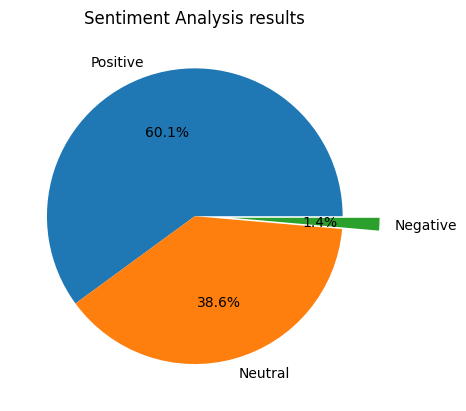

In [30]:
import matplotlib.pyplot as plt

plt.title("Sentiment Analysis results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [31]:
negatives = valueData[valueData['Vader Analysis']=="Negative"]
negatives.head()

,ResponseId,Benefit,Cleaned Benefits,POS tagged,Lemma,Vader Sentiment,Vader Analysis
23,R_reSYNbuRFGfXCSJ,"I have a good job, but I have regretted going ...",I have a good job but I have regretted going t...,"[(good, a), (job, n), (regretted, v), (going, ...",good job regret go school next year job elim...,-0.5267,Negative
37,R_2wS3FxZM7LjMfAX,I have been able to continue working in medica...,I have been able to continue working in medica...,"[(able, a), (continue, v), (working, v), (medi...",able continue work medical record make hour ...,-0.3570,Negative
53,R_2AZ6l0KazlYCH2O,I am working in a pediatric hospital as a Medi...,I am working in a pediatric hospital as a Medi...,"[(working, v), (pediatric, a), (hospital, n), ...",work pediatric hospital Medical coder work e...,-0.3818,Negative
205,R_C9YzOP64tth6Q4F,It is not as recognized as CPC or CAC and that...,It is not as recognized as CPC or CAC and that...,"[(recognized, v), (CPC, n), (CAC, n), (problem...",recognize CPC CAC problem get position somet...,-0.4019,Negative
273,R_9BkXbysVFCT2x2h,Even though it took quite a bit of time to fin...,Even though it took quite a bit of time to fin...,"[(Even, r), (though, None), (took, v), (quite,...",Even though take quite bit time find positio...,-0.2895,Negative


In [40]:
from collections import Counter
cnt = Counter()
for text in negatives['Lemma'].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(15)

[('job', 15),
 ('work', 11),
 ('RHIT', 9),
 ('able', 7),
 ('hospital', 7),
 ('credential', 6),
 ('pay', 5),
 ('get', 5),
 ('cod', 5),
 ('year', 4),
 ('position', 4),
 ('find', 4),
 ('experience', 4),
 ('take', 3),
 ('one', 3)]

In [34]:
sentiment = df1.merge(valueData, on='ResponseId')
sentiment.head()

,ResponseId,CredentialYear,Reason for Obtaining,Benefit_x,Q4: Value,Q5: Value_NPS_GROUP,Likely to Reccomend,Q6: Value,Q6: Value_9_TEXT,Q7: Value,...,Q10: Gender,Q11: Race/Ethnicity,Q12: Military,Q13: Age,Benefit_y,Cleaned Benefits,POS tagged,Lemma,Vader Sentiment,Vader Analysis
0,R_Ab1GK0xCu1rbaPT,Before 2013,Recognition of the credential and expertise th...,It has offered more opportunity early in my ca...,Very important.,Promoter,10.0,Other,CHC,"CHPS,Other",...,Female,White (not Hispanic or Latino): origins in any...,No,55-64 years old,It has offered more opportunity early in my ca...,It has offered more opportunity early in my ca...,"[(offered, v), (opportunity, n), (early, r), (...",offer opportunity early career hold secondar...,0.6808,Positive
1,R_OeaL9i8BtvgTFnj,Before 2013,To begin my career in the health information p...,Expanded over the course of the last 40+ years...,This credential is very important to me. I was...,Promoter,10.0,RHIA,NaN,NaN,...,Female,White (not Hispanic or Latino): origins in any...,No,65+,Expanded over the course of the last 40+ years...,Expanded over the course of the last years to ...,"[(Expanded, v), (course, n), (last, a), (years...",Expanded course last year many career opport...,0.4215,Positive
2,R_2QGMAy3g4WMOvLk,Before 2013,I really wanted to get into medical assisting ...,"Yes, it helped me understand the standards for...",I love learning and without this certification...,Promoter,10.0,NaN,NaN,NaN,...,Female,White (not Hispanic or Latino): origins in any...,No,55-64 years old,"Yes, it helped me understand the standards for...",Yes it helped me understand the standards for ...,"[(Yes, None), (helped, v), (understand, v), (s...",Yes help understand standard manage health i...,0.6597,Positive
3,R_2A14dRfGqXxqDDn,Before 2013,I knew it was the most widely accepted credent...,I have had to have current certification in al...,"To me, it means that I am dedicated to upholdi...",Promoter,9.0,Other,CEMA,NaN,...,Female,White (not Hispanic or Latino): origins in any...,No,45-54 years old,I have had to have current certification in al...,I have had to have current certification in al...,"[(current, a), (certification, n), (positions,...",current certification position today,0.0000,Neutral
4,R_1mIYTWRVujPvXHl,Before 2013,I heard about it as a high school SR and thoug...,It has given me the opportunity to do many dif...,Knowledge of both operations and revenue has...,Promoter,10.0,CCS,NaN,NaN,...,Female,White (not Hispanic or Latino): origins in any...,No,45-54 years old,It has given me the opportunity to do many dif...,It has given me the opportunity to do many dif...,"[(given, v), (opportunity, n), (many, a), (dif...",give opportunity many different thing career...,0.4215,Positive


In [35]:
sentiment.to_csv('RHIT_JTA_sentiment.csv')

In [41]:
alt.Chart(sentiment).mark_point().encode(
alt.X('Q11: Race/Ethnicity'),
     alt.Y('count(ResponseId)'),
alt.Color('Vader Analysis'))

ValueError: " Race/Ethnicity" is not one of the valid encoding data types: O, N, Q, T, G.
For more details, see https://altair-viz.github.io/user_guide/encodings/index.html#encoding-data-types. If you are trying to use a column name that contains a colon, prefix it with a backslash; for example "column\:name" instead of "column:name".

alt.Chart(...)

<Axes: xlabel='Q11: Race/Ethnicity', ylabel='Count'>

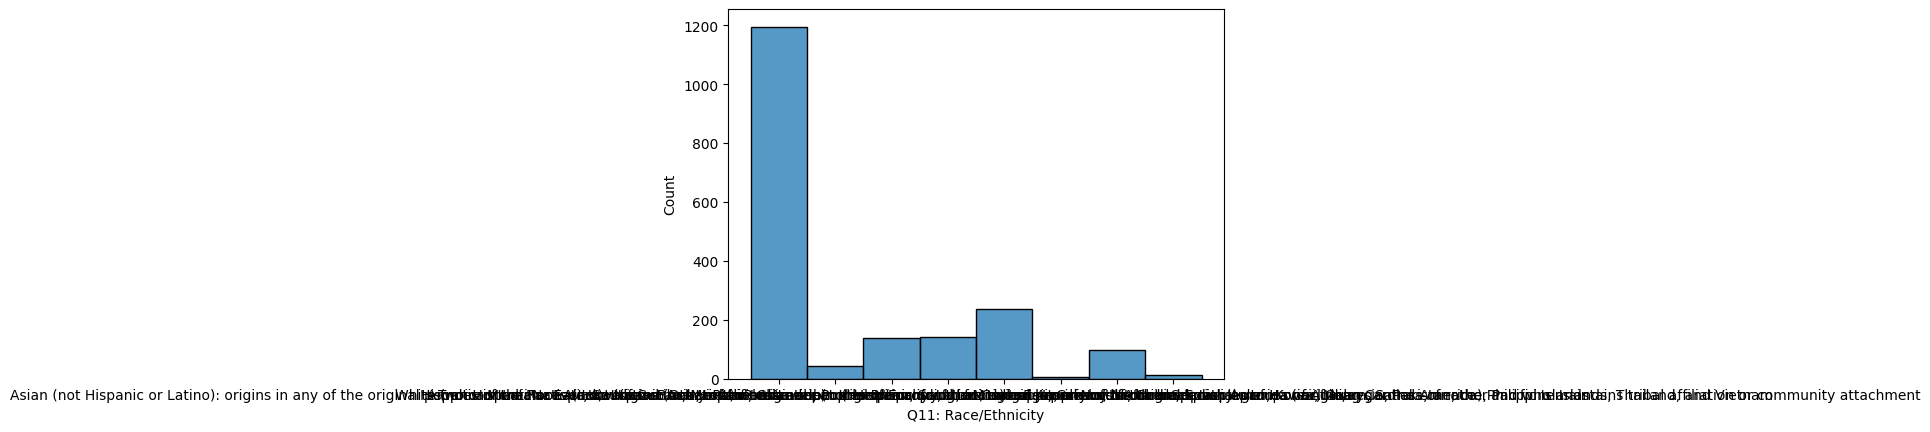

In [46]:
sns.histplot(sentiment,x='Q11: Race/Ethnicity')

<Axes: xlabel='Q10: Gender', ylabel='Count'>

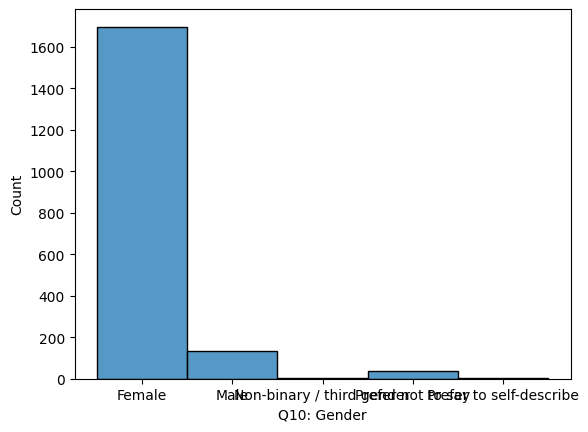

In [49]:
sns.histplot(sentiment,x='Q10: Gender')

In [39]:
alt.Chart(sentiment).mark_bar().encode(
alt.X('Q10: Gender'),
     alt.Y('count(Response ID)'),
alt.Color('Vader Analysis'))

ValueError: " Gender" is not one of the valid encoding data types: O, N, Q, T, G.
For more details, see https://altair-viz.github.io/user_guide/encodings/index.html#encoding-data-types. If you are trying to use a column name that contains a colon, prefix it with a backslash; for example "column\:name" instead of "column:name".

alt.Chart(...)